In [1]:
import pickle
import sift
import imagesearch

ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7f735160ae18>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py", line 600, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/kernelbase.py", line 234, in enter_eventloop
    self.eventloop(self)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/eventloops.py", line 168, in loop_tk
    kernel.timer = Timer(doi)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/eventloops.py", line 156, in __init__
    self.app = Tk()
  File "/usr/lib/python3.4/tkinter/__init__.py", line 1854, in __init__
    self.tk = _tkinter.create(screenName, baseName, className, interactive, wantobjects, useTk, sync, use)
_tkinter.TclError: no di

# 画像リストの取得

In [2]:
with open("./data/webimlist.txt") as f:
    imlist = f.readlines()
nbr_images = len(imlist)

# 画像と特徴量の語彙データ取得

In [3]:
with open("data/vocabulary.pkl", "rb") as f:
    voc = pickle.load(f)

# 画像検索用のテーブル作成

In [4]:
indx = imagesearch.Indexer("test.db", voc)
indx.create_tables()

OperationalError: table imlist already exists

# DBにデータを挿入

In [5]:
featlist = [ imlist[i][:-3] + "sift" for i in range(nbr_images)]

for i in range(nbr_images)[:100]:
    locs, descr = sift.read_features_from_file(featlist[i])
    indx.add_to_index(imlist[i], descr)
    
indx.db_commit()

# データを取得

In [6]:
from sqlite3 import dbapi2 as sqlite
con = sqlite.connect("test.db")
print(con.execute("select count (filename) from imlist").fetchone())
print(con.execute("select * from imlist").fetchone())

(100,)
('data/thumbnails/ukbench00000.th.jpg\n',)


In [7]:
src = imagesearch.Searcher("test.db", voc)
locs, descr = sift.read_features_from_file(featlist[0])
iw = voc.project(descr)

In [8]:
print("ask using a histogram...")
print(src.candidates_from_histogram(iw)[:10])

ask using a histogram...
[100, 99, 98, 97, 96, 95, 94, 93, 92, 91]


In [9]:
src = imagesearch.Searcher("test.db", voc)
print("try a query...")
imlist[0]
print(src.query(imlist[0])[:10])

try a query...
[(0.0, 1), (2.6457513110645907, 4), (2.8284271247461903, 2), (2.8284271247461903, 49), (3.0, 22), (3.1622776601683795, 52), (3.3166247903553998, 76), (3.4641016151377544, 65), (3.7416573867739413, 67), (4.0, 3)]


In [10]:
imagesearch.compute_ukbench_score(src, imlist)

0.0058823529411764705

# Image Results

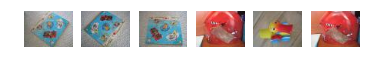

In [11]:
%matplotlib inline

nbr_results = 6
res = [w[1] for w in src.query(imlist[0])[:nbr_results]]
imagesearch.plot_results(src, res)

In [13]:
from scipy import ransac

ImportError: cannot import name 'ransac'